In [7]:
import pandas as pd
import coremltools as cml
from sklearn import tree
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import graphviz
from IPython.display import Image

## Building Data and Saving as JSON File

In [20]:
csv_d = pd.read_csv('simulated.csv', sep='\t')
csv_d.to_json('simulated.json', orient='records')

## Making a model from simulated dataset above

In [21]:
train_data = pd.read_json('simulated.json')
test_data = None
train_data

,comment,jog_abs_dist_,jog_abs_time_,jog_frac_dist_,jog_frac_time_,pace,stage,tot_dist,tot_time
0,'week 1',1.00,8,0.40,0.40,35.714286,1,0.70,25.0
1,'week 2',1.20,12,0.60,0.43,35.211268,2,0.71,25.0
2,'week 3',1.20,9,0.50,0.45,33.823529,3,0.68,23.0
3,'week 4',2.40,16,0.75,0.70,13.250000,4,2.00,26.5
4,'week 5 d1',2.40,15,0.75,0.72,13.000000,5,2.00,26.0
5,'week 5 d2',2.40,15,0.75,0.72,12.750000,6,2.00,25.5
6,'week 5 d3',2.40,15,0.75,0.72,12.500000,7,2.00,25.0
7,'week 6 d1',4.43,18,0.78,0.75,12.888889,8,2.25,29.0
8,'week 6 d2',3.22,20,0.89,0.87,12.444444,9,2.25,28.0
9,'week 6 d3',3.62,22,1.00,1.00,12.000000,10,2.25,27.0


In [22]:
X = train_data.loc[:, ['tot_time', 'pace','tot_dist']]
Y = train_data.loc[:, ['stage']]
print(X.shape)
print(Y.shape)

(13, 3)
(13, 1)


In [23]:
model = tree.DecisionTreeClassifier()
# model = linear_model.LogisticRegression()
model.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

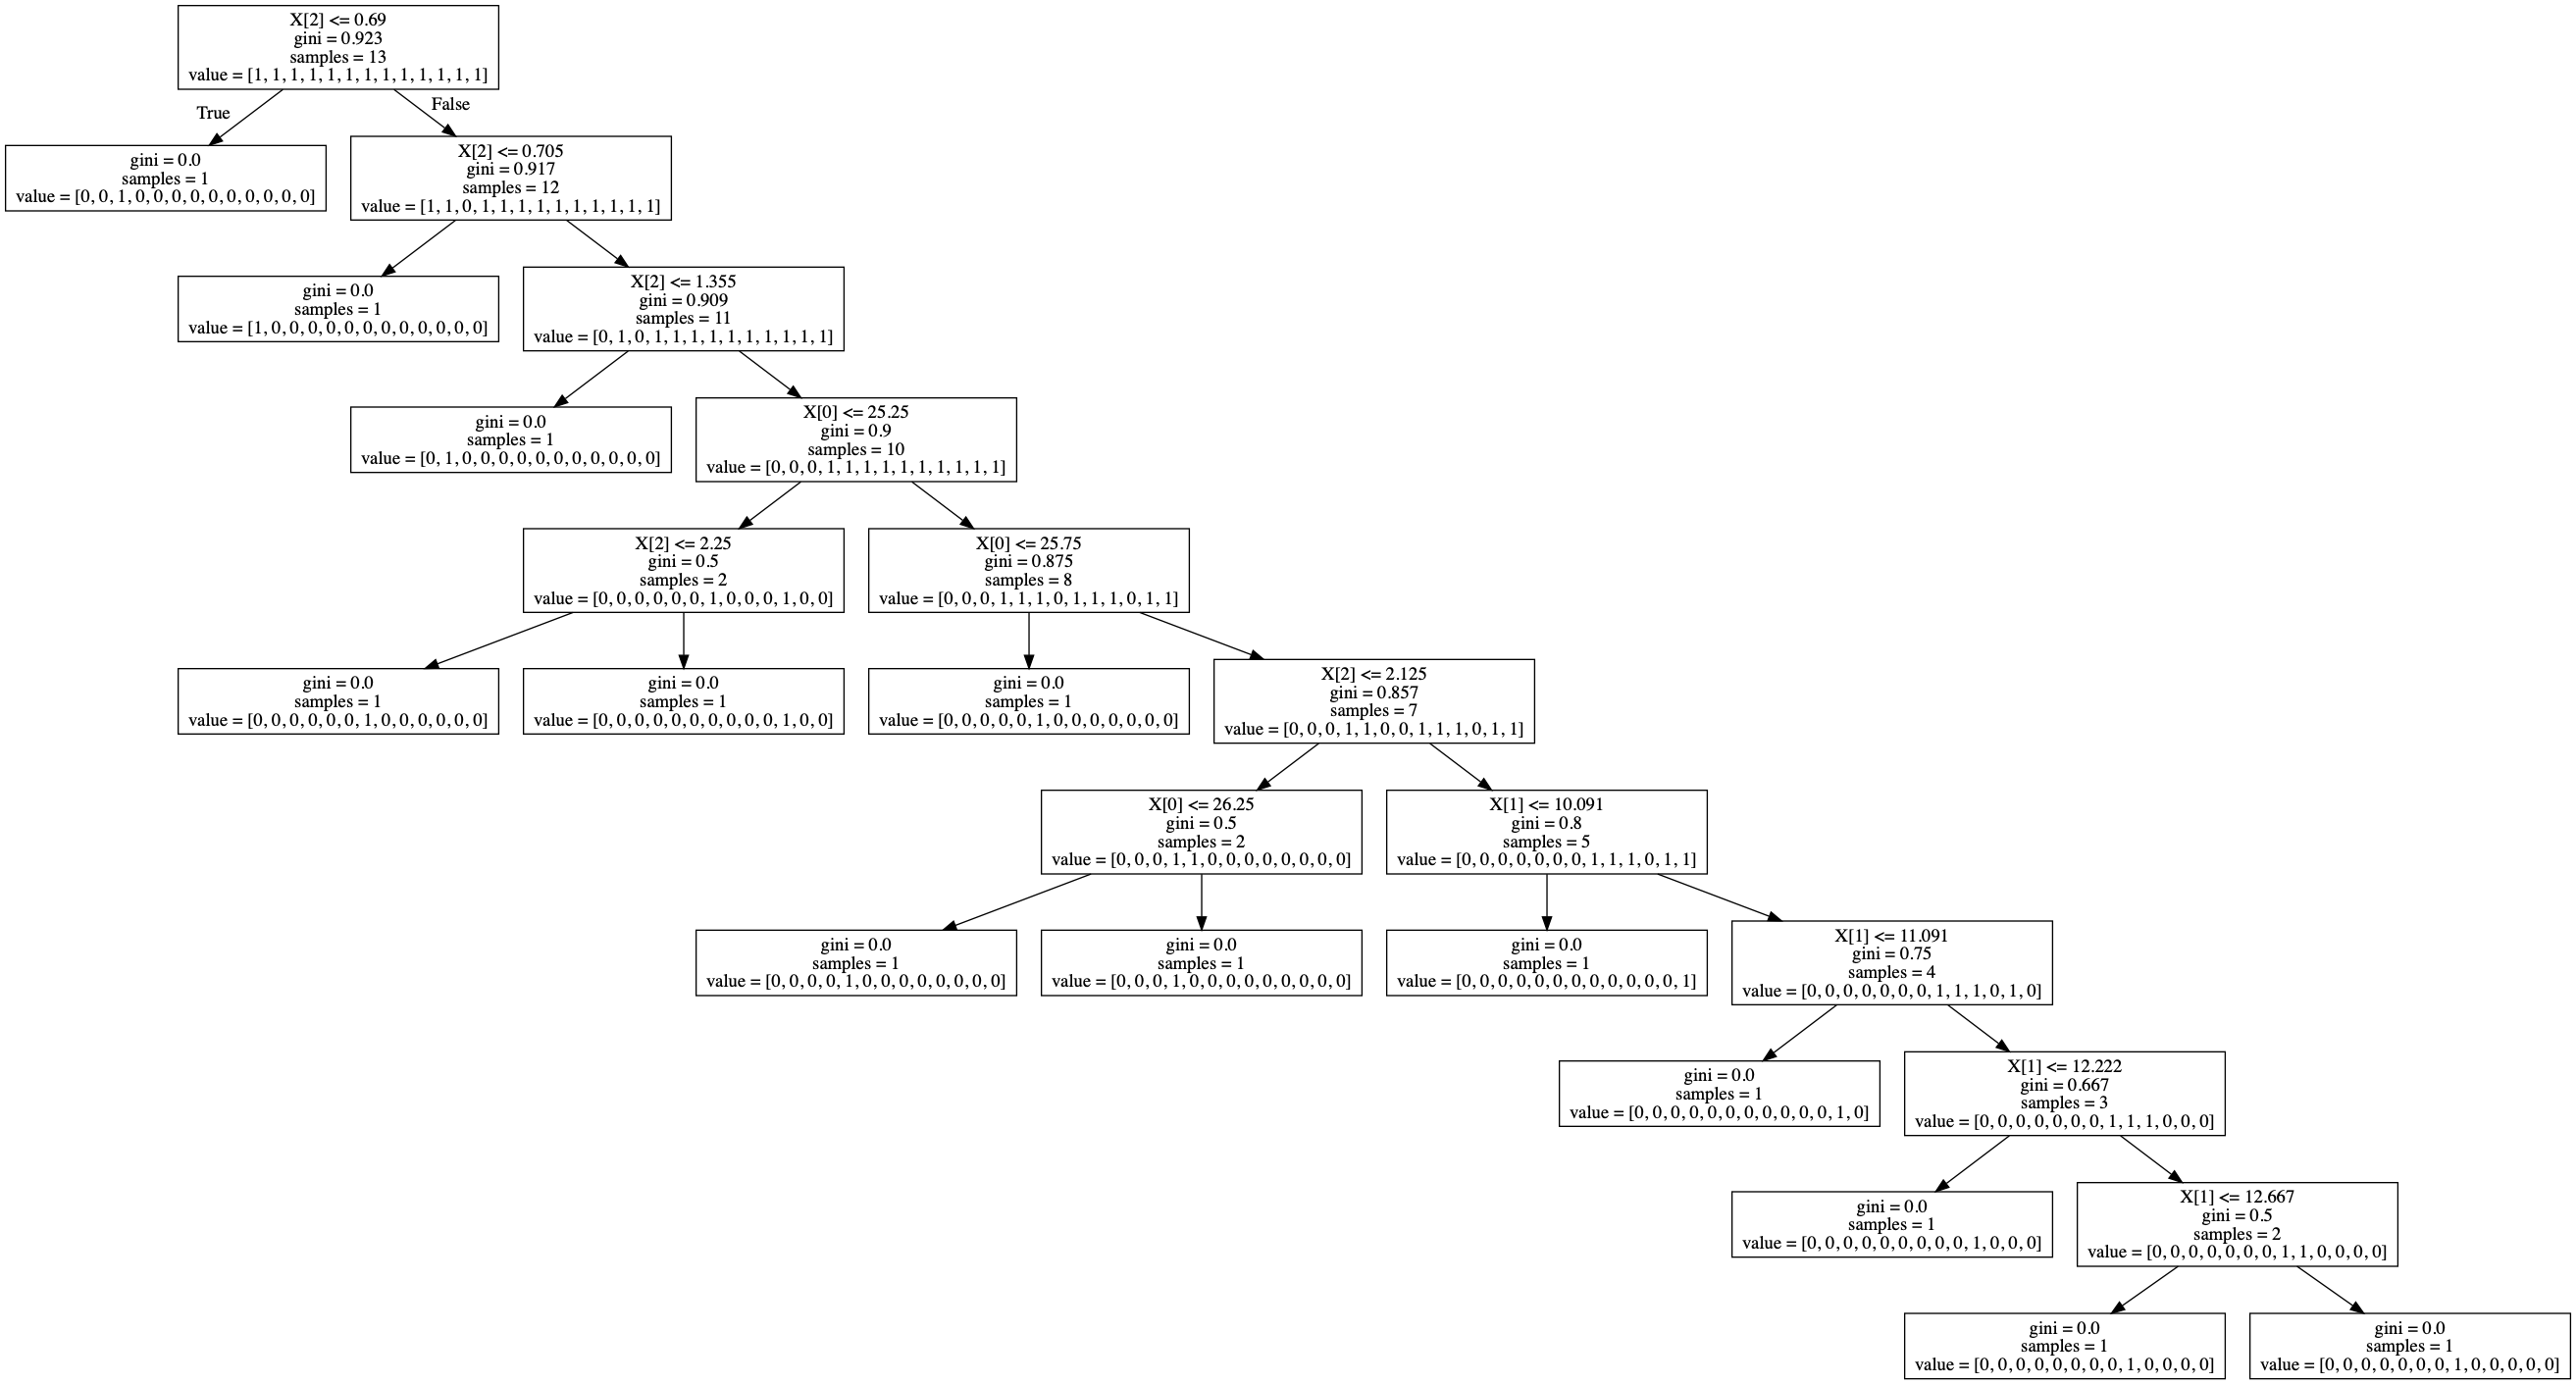

In [24]:
dot_data = tree.export_graphviz(model, out_file='sample.dot')
!dot -Tpng sample.dot -o tree.png
Image('tree.png')

In [25]:
cmlmodel = cml.converters.sklearn.convert(model, ['tot_time', 'tot_dist', 'pace'],"stage")

In [16]:
# potential Pull Request
# cml.models.utils.save_spec(model,'/Users/akshitarora/Documents/GitHub/courses/ml_hci/StageCalculator.mlmodel')

AttributeError: 'DecisionTreeClassifier' object has no attribute 'SerializeToString'